# Medidas de evaluación en clústers

Usamos métodos de evaluación interna cuando las etiquetas verdaderas no son conocidas de antemano. La desventaja principal de estos métodos es que no estamos siendo objetivos; es decir, no estamos comparando con nada que sepamos que es verdadero sino la capacidad del algoritmo para separar correctamente los datos.

## Cohesión

El criterio de cohesión da una medida de cuán juntos están los puntos dentro de un clúster.

Supongamos que hemos divido nuestra información en $k$ clústers $C_1,C_2,...C_k$. Tomando $I$ fijo, para cada observación $i\in C_I$ sea $$a_i=\frac{1}{|C_I|-1}\sum_{j\in C_I,\,j\neq i}d(i,j)$$

El valor $a_i$ es el promedio de todas las distancias desde la observación $i$ a todos los elementos del clúster al que pertenece. Por lo tanto, si $a_i$ es pequeño, entonces $i$ está muy cerca de todos los elementos de su clúster.

Este es el promedio de todas las distancias de un cluster, tomando en cuenta todos los elementos(columnas)



 La distancia euclideana es la distancia de ((X1 - X2)**2+(Y1-Y2)**2 )**0.5

## Separación

El criterio de separación da una medida de cuán está separado un punto de los pertenecientes a los clústers a los cuales no pertenece.

Para cada $i\in C_I$, se define $$b_i=\min_{I\neq J}\frac{1}{|C_J|}\sum_{j\in C_J}d(i,j)$$

Entre mayor sea $b_i$, entonces $i$ está muy alejado de los otros clústers.

Aqui tomaria el promedio menor de las distancias con otros clusters

## Silueta

Ahora, para cada $i$, sea $$s_i=\frac{b_i-a_i}{\max\{a_i,b_i\}}\mbox{ si }|C_I|>1$$ y $s_i=0$ si $|C_I|=1$ (es decir, $C_I=\{i\}$).

Por lo tanto $-1\le s_i\le 1$. Al número $s_i$ se le llama *silueta de la observación $i$*.

Notemos que:
- $s_i$ es cercano a 1 si y solo si $a_i$ es cercano a 0, y por lo tanto $i$ está "bien clasificado".
- $s_i$ es cercano a -1 si y solo si $b_i$ es cercano a 0, y por lo tanto $i$ puede clasificarse mejor si se incluye en su clúster vecino.
- $s_i$ es cercano a 0 si y solo si $b_i$ y $a_i$ se parecen mucho, por lo cual $i$ es una observación complicada de clasificar.

Finalmente, se define la silueta total como el promedio de las siluetas de todos los clusters.

In [ ]:
import os
import pandas as pd
import numpy as np
from plotnine import *
from sklearn import preprocessing
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

url = "https://raw.githubusercontent.com/JuanCarlosCS19/ML_Toulouse_ENE_2024/main/Clase3/datos_iris.csv"
mi_data = pd.read_csv(url)
columnas_sepal = mi_data.filter(regex='^Sepal')

In [ ]:
columnas_sepal

In [ ]:
(ggplot(data = mi_data) +
    geom_point(mapping=aes(x="Sepal_Length",y="Sepal_Width"))
)

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing

# Lee el conjunto de datos
mi_data = pd.read_csv(url)

# Selecciona columnas que comienzan con "Sepal"
columnas_sepal = mi_data.filter(regex='^Sepal')




In [ ]:
# Normaliza los datos
escalador = preprocessing.normalize(columnas_sepal)
mi_data_normalizado_df = pd.DataFrame(escalador, index=columnas_sepal.index, columns=columnas_sepal.columns)



In [ ]:
# Aplica KMeans
k_medias = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
k_medias.fit(mi_data_normalizado_df)
Etiquetas = k_medias.labels_

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_score(mi_data_normalizado_df,Etiquetas)

In [ ]:
from sklearn.metrics import silhouette_samples


siluetas = silhouette_samples(mi_data_normalizado_df, Etiquetas)


In [ ]:
siluetas

In [ ]:

# Agrega las columnas al DataFrame original
mi_data['siluetas'] = siluetas
mi_data['etiquetas'] = Etiquetas.astype(str)

(ggplot(mi_data, aes(x='Sepal_Length', y='Sepal_Width', color='siluetas', shape='etiquetas')) +
 geom_point()
)

# Como se puede ver la silueta esta muy bien clasificada, como el color de las siluetas es mas oscuro probablemente no tienen una clasificacion correcta

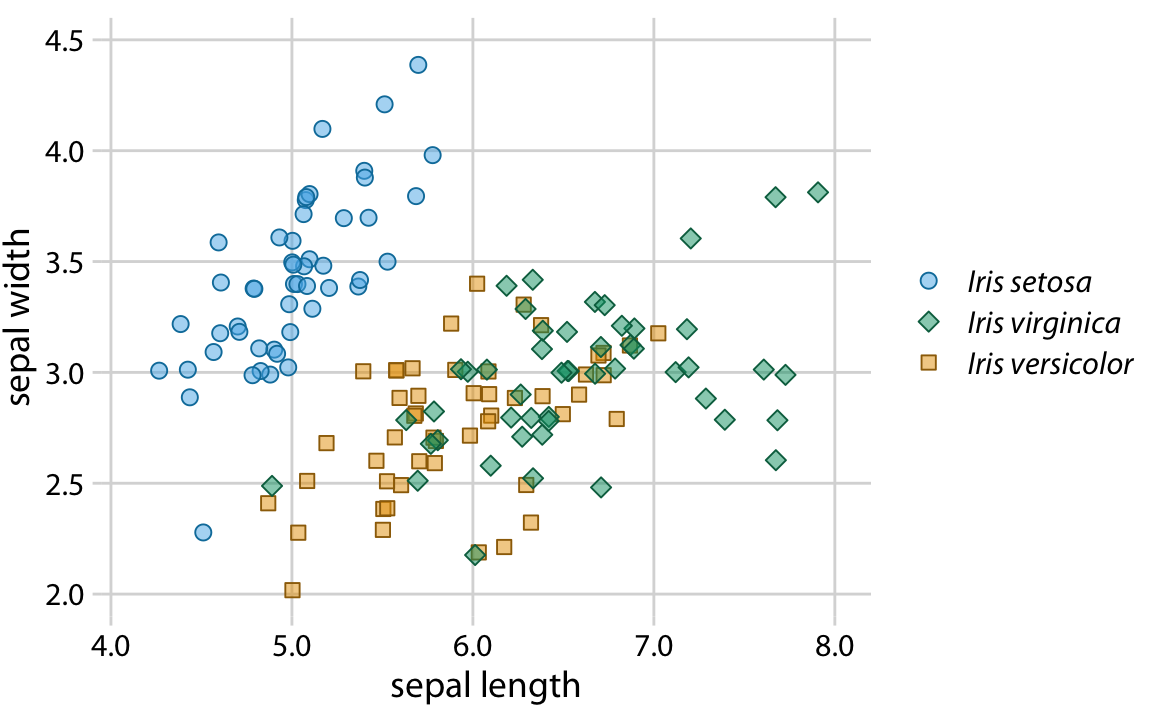

In [ ]:
from sklearn.metrics import calinski_harabasz_score


def constructor_clusters(data,k):
    escalador = preprocessing.normalize(data)
    mi_data_normalizado_df = pd.DataFrame(escalador,
                                      index=data.index,
                                      columns=data.columns)

    k_medias = KMeans(n_clusters = k ,init='k-means++')
    k_medias.fit(mi_data_normalizado_df)
    Etiquetas = k_medias.labels_
    silueta = silhouette_score(mi_data_normalizado_df,Etiquetas)
    cal_har = calinski_harabasz_score(mi_data_normalizado_df,Etiquetas) # CALINSKI SE BASA EN LA DENSIDAD

    return k, Etiquetas, silueta, cal_har

In [ ]:
mi_data.columns

In [ ]:
mi_data_normalizado_df

In [ ]:
constructor_clusters(mi_data_normalizado_df,4)

In [ ]:
modelos_kmedias = [constructor_clusters(mi_data_normalizado_df,k) for k in range(2,10)]

In [ ]:
resultados = pd.DataFrame([(x[0],x[2],x[3]) for x in modelos_kmedias],
             columns = ["k","silueta","calinski_harabasz"])

In [ ]:
resultados #Para el caso de clusters la silueta mas grande es la indicada y en calinski el mas pequeño

In [ ]:
(ggplot(data = resultados) +
    geom_point(mapping = aes(x="k",y="silueta"),color = "red") +
    geom_line(mapping = aes(x="k",y="silueta"),color = "red")
)

In [ ]:
modelos = KMeans()

visualizer = KElbowVisualizer(modelos, k=(2,10),metric = "silhouette")
visualizer.fit(mi_data_normalizado_df)
visualizer.show()

In [ ]:
modelos = KMeans()

visualizer = KElbowVisualizer(modelos, k=(2,10),metric = "calinski_harabasz")
visualizer.fit(mi_data_normalizado_df)
visualizer.show()